# **Final Project 4: Konsep Clustering**

Kelompok 7:
1. Fayza Chairunnisa Permana (PYTN-KS18-09)
2. Febriansyah Permana (PYTN-KS18-06)
3. Fenti Febriani (PYTN-KS18-04)

# **1. Introduction**

*   **Informasi Dataset**

Dataset didapatkan melalui link berikut:
https://www.kaggle.com/datasets/arjunbhasin2013/ccdata/

Dataset ini adalah database yang berisikan informasi terkait pengembangan segmentasi pelanggan untuk menentukan strategi pemasaran. Sampel Dataset merangkum perilaku penggunaan sekitar 9000 pemegang kartu kredit aktif selama 6 bulan terakhir. File tersebut berada di tingkat pelanggan dengan 18 variabel perilaku. Dari dataset ini, siswa diharapkan dapat memprediksi pengembangan segmentasi pelanggan untuk menentukan strategi pemasaran menggunakan model K-Means.

*   **Latar Belakang**

Kasus yang dipilih adalah salah satu penerapan pembelajaran yang telah dilakukan dalam program Studi Independen di Hacktiv8 Batch 5 terkait konsep Clustering


* **Objective**

1. Mampu memahami konsep Clustering
dengan model K-Means.

2. Mampu mempersiapkan data untuk digunakan dalam model K-Means.

3. Mampu mengimplementasikan K-Means.
untuk membuat
prediksi.

# **2. Import Pustaka yang akan digunakan**

In [411]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy.stats.mstats import winsorize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from imblearn.over_sampling import SMOTE
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings(action="ignore")
import pickle

# **3. Data Loading**

In [412]:
df = pd.read_csv('/content/CC GENERAL.csv')
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [413]:
df.shape

(8950, 18)

Dataframe diatas memiliki 8950 baris dan 18 kolom

In [414]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [415]:
df.columns.values

array(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'], dtype=object)

In [416]:
# cek kolom dengan tipe data object/categorical
df.describe(include=object).T

,count,unique,top,freq
CUST_ID,8950,8950,C10001,1


# **4. Data Cleaning**

## **Missing Value**

In [417]:
# Cek Missing Value
print(df.isnull().sum())

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


Pengecekan missing value diatas terdapat pada kolom CREDIT_LIMIT sebanyak 1 baris dan kolom MINIMUM_PAYMENTS sebanyak 313 baris

## **Menghapus Cust_ID karena tidak diperlukan**

In [418]:
df = df.drop('CUST_ID', axis=1)
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


## **Melakukan pengisian missing value dengan median**

In [419]:
# Isi nilai yang hilang
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(), inplace=True)
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].median(), inplace=True)
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [420]:
df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

Penanganan missing value selesai, dan tidak ada lagi missing value pada dataset diatas.

## **Duplicated Data**

In [421]:
# cek duplikasi data
df.duplicated().any()

False

Tidak adanya duplikat data pada dataset tersebut, maka tidak perlu melakukan penghapusan data duplikat

# **5. Exploratory Data Analysis**

## **Kami mengubah nama kolom menjadi seperti berikut:**

In [422]:
df = df.rename(columns={'BALANCE':'Saldo',
                        'BALANCE_FREQUENCY':'Frekuensi Saldo',
                        'PURCHASES':'Pembelian',
                        'ONEOFF_PURCHASES':'Pembelian One off',
                        'INSTALLMENTS_PURCHASES':'Pembelian Angsuran',
                        'CASH_ADVANCE':'Penarikan Tunai',
                        'PURCHASES_FREQUENCY':'Frekuensi Pembelian',
                        'ONEOFF_PURCHASES_FREQUENCY':'Frekuensi Pembelian One off',
                        'PURCHASES_INSTALLMENTS_FREQUENCY':'Frekuensi Pembelian Angsuran',
                        'CASH_ADVANCE_FREQUENCY':'Frekuensi Penarikan Tunai',
                        'CASH_ADVANCE_TRX':'Penarikan Tunai TRX',
                        'PURCHASES_TRX':'Pembelian TRX',
                        'CREDIT_LIMIT':'Batas Kredit',
                        'PAYMENTS':'Pembayaran',
                        'MINIMUM_PAYMENTS':'Minimal Pembayaran',
                        'PRC_FULL_PAYMENT':'Pembayaran Full PRC',
                        'TENURE':'Jangka Waktu'})

df.head()

,Saldo,Frekuensi Saldo,Pembelian,Pembelian One off,Pembelian Angsuran,Penarikan Tunai,Frekuensi Pembelian,Frekuensi Pembelian One off,Frekuensi Pembelian Angsuran,Frekuensi Penarikan Tunai,Penarikan Tunai TRX,Pembelian TRX,Batas Kredit,Pembayaran,Minimal Pembayaran,Pembayaran Full PRC,Jangka Waktu
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [423]:
df.columns

Index(['Saldo', 'Frekuensi Saldo', 'Pembelian', 'Pembelian One off',
       'Pembelian Angsuran', 'Penarikan Tunai', 'Frekuensi Pembelian',
       'Frekuensi Pembelian One off', 'Frekuensi Pembelian Angsuran',
       'Frekuensi Penarikan Tunai', 'Penarikan Tunai TRX', 'Pembelian TRX',
       'Batas Kredit', 'Pembayaran', 'Minimal Pembayaran',
       'Pembayaran Full PRC', 'Jangka Waktu'],
      dtype='object')

## **Central Tendency**

In [424]:
central_tendency = pd.DataFrame({
    'Mean': df.mean(),
    'Median': df.median(),
    'Minimum': df.min(),
    'Modus': df.mode().iloc[0]  # Mengambil modus untuk setiap kolom
})
central_tendency['skew'] = np.where(central_tendency['Mean']< central_tendency['Median'], 'Left skewed', 'Right skewed')
central_tendency

,Mean,Median,Minimum,Modus,skew
Saldo,1564.474828,873.385231,0.000000,0.000000,Right skewed
Frekuensi Saldo,0.877271,1.000000,0.000000,1.000000,Left skewed
Pembelian,1003.204834,361.280000,0.000000,0.000000,Right skewed
Pembelian One off,592.437371,38.000000,0.000000,0.000000,Right skewed
Pembelian Angsuran,411.067645,89.000000,0.000000,0.000000,Right skewed
Penarikan Tunai,978.871112,0.000000,0.000000,0.000000,Right skewed
Frekuensi Pembelian,0.490351,0.500000,0.000000,1.000000,Left skewed
Frekuensi Pembelian One off,0.202458,0.083333,0.000000,0.000000,Right skewed
Frekuensi Pembelian Angsuran,0.364437,0.166667,0.000000,0.000000,Right skewed
Frekuensi Penarikan Tunai,0.135144,0.000000,0.000000,0.000000,Right skewed


In [425]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Saldo,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
Frekuensi Saldo,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
Pembelian,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
Pembelian One off,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
Pembelian Angsuran,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
Penarikan Tunai,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
Frekuensi Pembelian,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
Frekuensi Pembelian One off,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
Frekuensi Pembelian Angsuran,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
Frekuensi Penarikan Tunai,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


Terlihat bahwa dalam dataset statistik diatas yaitu:
*   Balance/Saldo memiliki rata-rata 1564 dan saldo maksimum yaitu 19043
*   Balance Frequency/Frekuensi Saldo memiliki nilai rata-rata 0.88 dengan maksimal 1.00
*   Purchases/Pembelian memiliki nilai rata-rata 1003 dengan nilai maksimal yaitu 49039
*   Purchases Frequency/Frekuensi Pembelian memiliki rata-rata 0.49 dengan nilai maksimal yaitu 1.00
*   Credit Limit/Batas Kredit memiliki nilai minimal yaitu 50 dan nilai maksimal yaitu 30000
*   Payments/Pembayaran diatas memiliki nilai rata-rata yaitu 1733

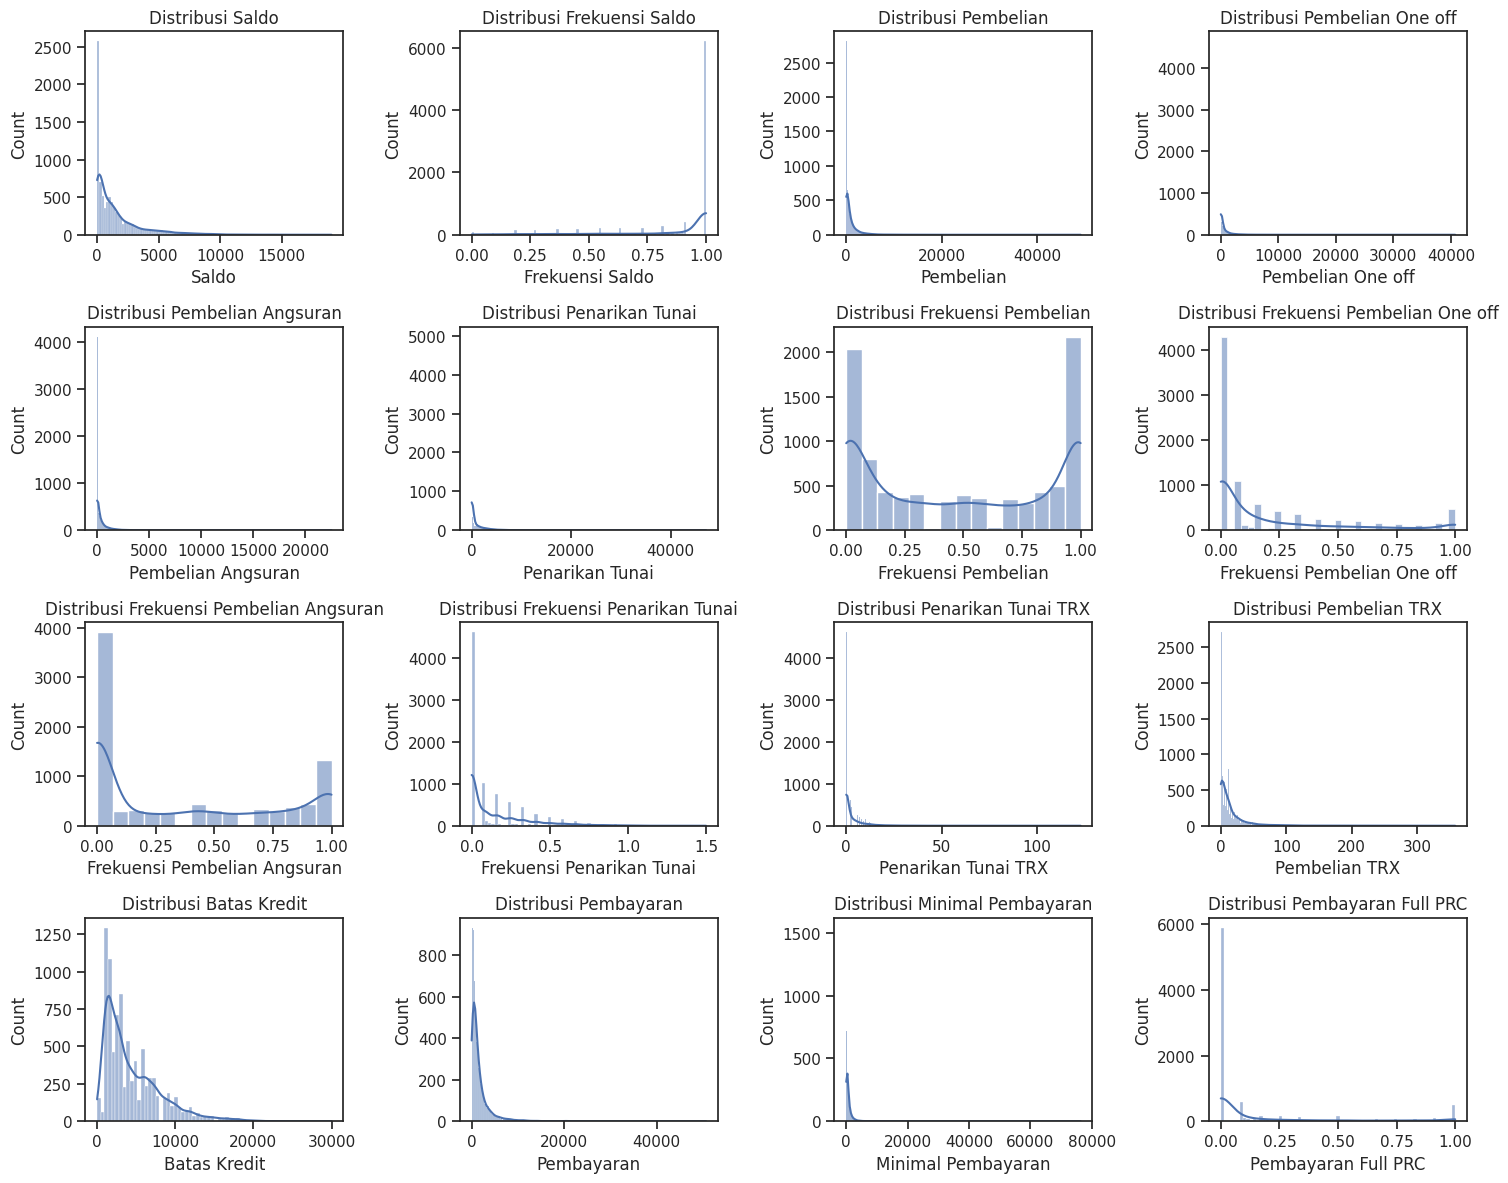

In [426]:
# Memvisualisasikan distribusi data untuk setiap kolom
plt.figure(figsize=(15, 12))
for i, column in enumerate(df.columns[:16]):
    plt.subplot(4, 4, i % 16 + 1)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribusi {column}')
    plt.tight_layout()

plt.show()

## **Variability**

In [427]:
# Memilih kolom yang akan dihitung variabilitasnya
saldo = df['Saldo']
pembelian = df['Pembelian']

# Menghitung varians
variance_saldo = np.var(saldo)
variance_pembelian = np.var(pembelian)

# Menghitung deviasi standar
std_dev_saldo = np.sqrt(variance_saldo)
std_dev_pembelian = np.sqrt(variance_pembelian)

# Menampilkan hasil
print(f"Variabilitas Saldo: Varians = {variance_saldo}, Deviasi Standar = {std_dev_saldo}")
print(f"Variabilitas Pembelian: Varians = {variance_pembelian}, Deviasi Standar = {std_dev_pembelian}")

Variabilitas Saldo: Varians = 4332290.856259278, Deviasi Standar = 2081.415589510965
Variabilitas Pembelian: Varians = 4564698.111981509, Deviasi Standar = 2136.5154134668696


Hasil perhitungan variabilitas untuk kolom "Saldo" dan "Pembelian" adalah sebagai berikut:
1.   Variabilitas Saldo:
*   Varians = 4,332,290.86
*   Deviasi Standar = 2,081.42

Variabilitas saldo mengukur seberapa jauh nilai saldo setiap entitas dalam dataset dari rata-ratanya. Dengan varians sebesar 4,332 dan deviasi standar sekitar 2,081,kita dapat menyimpulkan bahwa saldo dalam dataset memiliki variasi yang cukup besar dari nilai rata-ratanya.
2.   Variabilitas Pembelian:
*   Varians = 4,564,698.11
*   Deviasi Standar = 2,136.52

Variabilitas pembelian mengukur seberapa jauh nilai pembelian setiap entitas dalam dataset dari rata-ratanya. Dengan varians sebesar 4,564 dan deviasi standar sekitar 2,136, kita dapat menyimpulkan bahwa pembelian dalam dataset juga memiliki variasi yang cukup besar dari nilai rata-ratanya.



Lebih rendahnya nilai deviasi standar menunjukkan sebaran data yang lebih padat di sekitar rata-rata, sementara deviasi standar yang lebih tinggi menunjukkan sebaran data yang lebih luas dari rata-rata. Dalam konteks ini, kedua kolom tersebut memiliki variabilitas yang signifikan.

### **Top 5 Jumlah Pembelian tertinggi Oleh Customer**

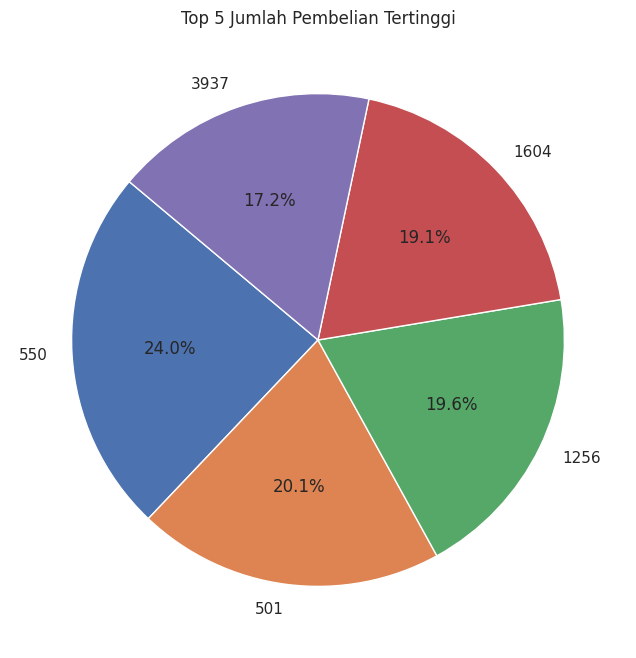

In [428]:
# Mengurutkan dataframe berdasarkan kolom "Pembelian" secara descending
df_sorted_by_pembelian = df.sort_values(by='Pembelian', ascending=False)

# Mengambil top 5 data dengan pembelian tertinggi
top5_pembelian = df_sorted_by_pembelian.head(5)

# Menyiapkan data untuk pie plot
labels = top5_pembelian.index
sizes = top5_pembelian['Pembelian']

# Membuat pie plot
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Jumlah Pembelian Tertinggi')
plt.show()

In [429]:
# Mengurutkan dataset berdasarkan kolom "Pembelian" secara menurun
top_purchases = df.sort_values(by='Pembelian', ascending=False).head(5)

# Menampilkan hasil
print("Top 5 Jumlah Pembelian Tertinggi:")
print(top_purchases[['Pembelian']])

Top 5 Jumlah Pembelian Tertinggi:
      Pembelian
550    49039.57
501    41050.40
1256   40040.71
1604   38902.71
3937   35131.16


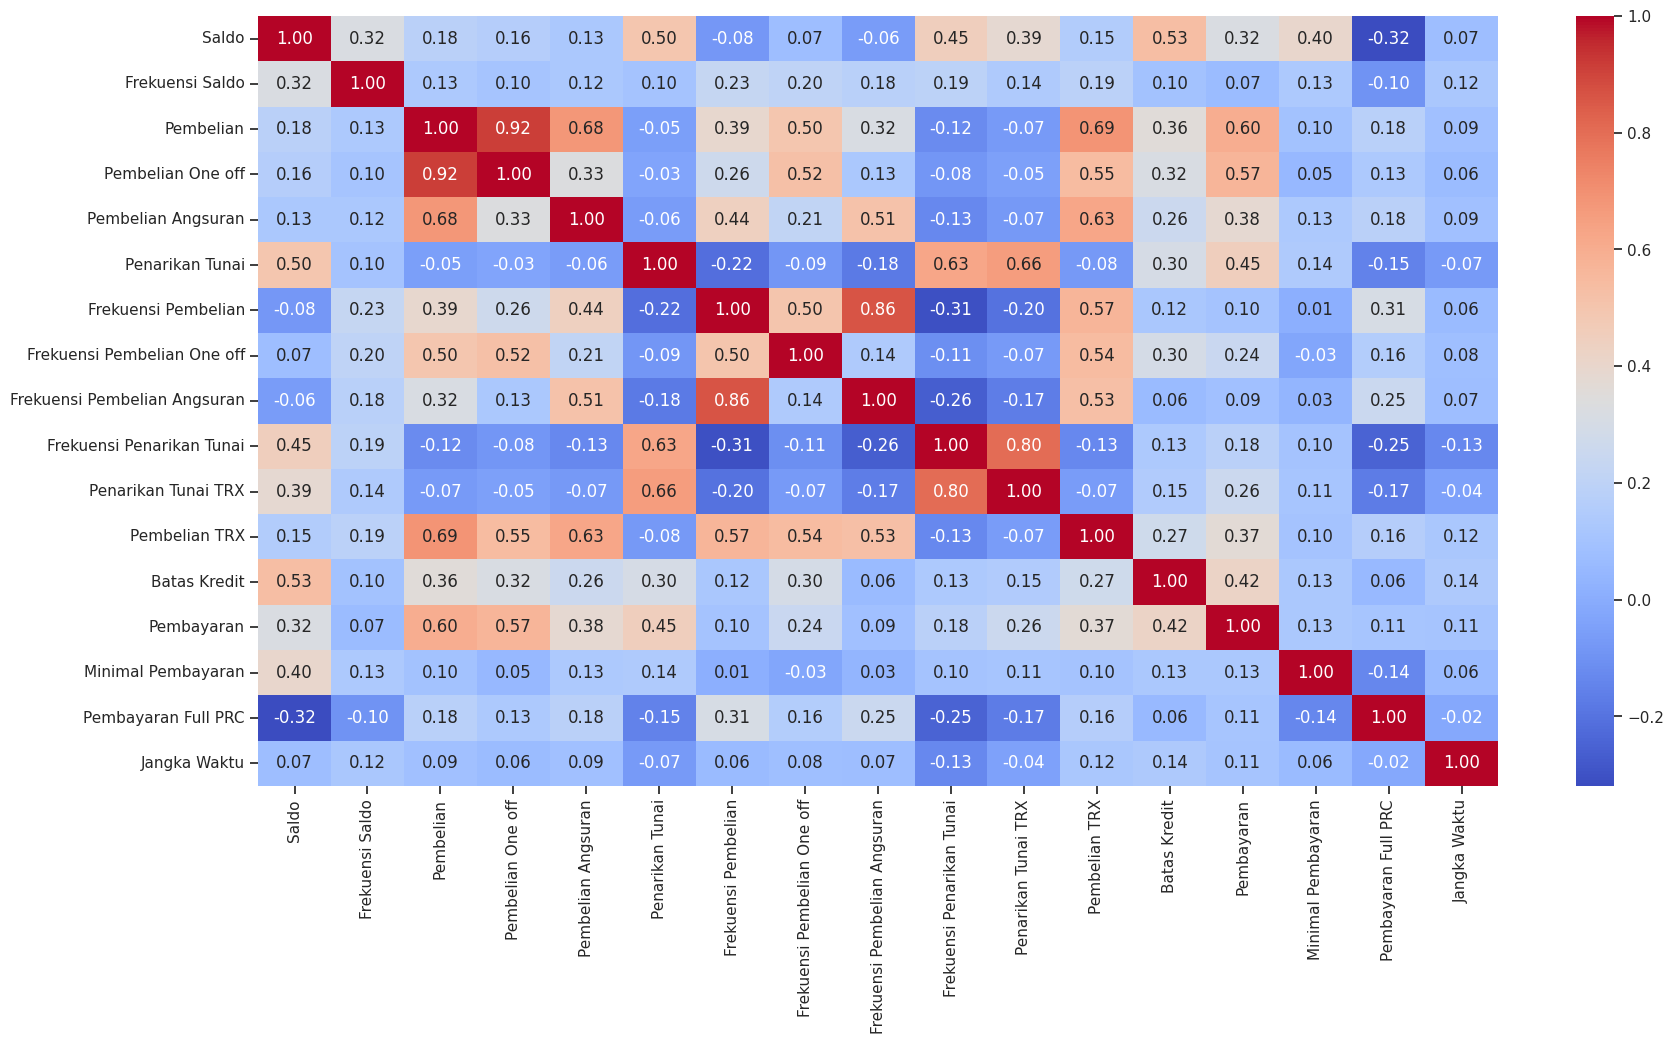

In [430]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

Pada heatmap diatas memiliki korelasi yang cukup tinggi yaitu:
* kolom Pembelian dengan kolom Pembelian One Off memiliki korelasi yaitu 0.92
* kolom Frekuensi Pembelian dengan kolom Frekuensi Pembelian Angsuran memiliki korelasi yaitu 0.86
* kolom Frekuensi Penarikan Tunai dengan kolom Penarikan Tunai TRX memiliki korelasi yaitu 0.80

Adapun korelasi yang cukup rendah yaitu
* kolom Saldo dengan kolom Pembayaran Full PRC memiliki korelasi yaitu -0.32
* kolom Frekuensi Pembelian dengan kolom Frekuensi Penarikan Tunai memiliki korelasi yaitu -0.31
* kolom Frekuensi Pembelian Angsuran dengan kolom Frekuensi Penarikan Tunai memiliki korelasi yaitu -0.26



# **6. Data Preprocessing**

## **Normalization**

In [431]:
# Initialize the RobustScaler
scaler = RobustScaler()

# Fit the scaler on your data and transform the data
scaled_data = scaler.fit_transform(df)

# Convert the scaled data back to a DataFrame for easier analysis (optional)
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)

In [432]:
scaled_df.head()

,Saldo,Frekuensi Saldo,Pembelian,Pembelian One off,Pembelian Angsuran,Penarikan Tunai,Frekuensi Pembelian,Frekuensi Pembelian One off,Frekuensi Pembelian Angsuran,Frekuensi Penarikan Tunai,Penarikan Tunai TRX,Pembelian TRX,Batas Kredit,Pembayaran,Minimal Pembayaran,Pembayaran Full PRC,Jangka Waktu
0,-0.432267,-1.636364,-0.248371,-0.065812,0.013657,0.000000,-0.399999,-0.277777,-0.111112,0.000000,0.00,-0.3125,-0.408163,-0.431595,-0.279732,0.000000,0.0
1,1.209374,-0.818182,-0.337489,-0.065812,-0.189912,5.784542,-0.600000,-0.277777,-0.222223,1.125001,1.00,-0.4375,0.816327,2.138626,1.230054,1.555556,0.0
2,0.842099,0.000000,0.384766,1.273231,-0.189912,0.000000,0.600000,3.055557,-0.222223,0.000000,0.00,0.3125,0.918367,-0.154715,0.509732,0.000000,0.0
3,0.411913,-3.272727,1.062798,2.530286,-0.189912,0.184759,-0.500000,0.000000,-0.222223,0.374999,0.25,-0.3750,0.918367,-0.564547,0.000000,0.000000,0.0
4,-0.028907,0.000000,-0.322542,-0.038102,-0.189912,0.000000,-0.500000,0.000000,-0.222223,0.000000,0.00,-0.3750,-0.367347,-0.117644,-0.109334,0.000000,0.0


# **7. Pendefinisian Model**

K-means clustering adalah metode dalam analisis data dan statistika yang digunakan untuk mengelompokkan data menjadi beberapa kelompok (cluster) berdasarkan kemiripan karakteristik atau atribut tertentu. Tujuan dari k-means clustering adalah untuk mengelompokkan data ke dalam kelompok-kelompok yang memiliki tingkat kesamaan yang tinggi di antara anggotanya.

In [433]:
kmeans_model = KMeans(n_clusters=3, random_state=42)

# **8. Pelatihan Model**

In [434]:
kmeans_model.fit(scaled_df)

KMeans(n_clusters=3, random_state=42)

# **9. Evaluasi Model**

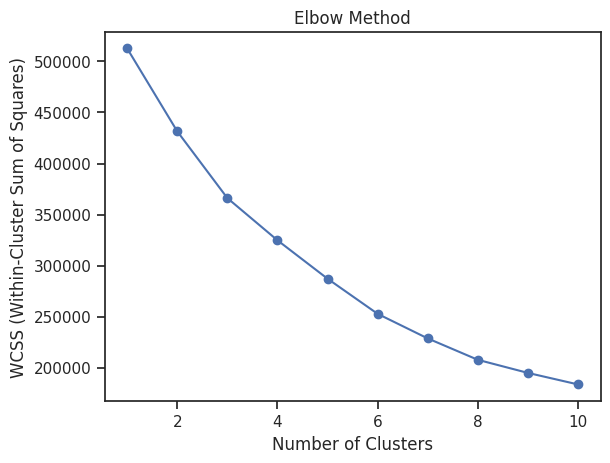

In [435]:
# Inisialisasi list untuk menyimpan nilai WCSS
wcss = []

# Loop untuk mencoba jumlah kluster dari 1 hingga 10
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)

# Plot elbow method
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

Grafik ini akan menunjukkan "siku" (elbow) di titik di mana penurunan nilai WCSS mulai melambat. Pada titik ini, penambahan kluster tidak lagi memberikan penurunan WCSS yang signifikan, dan itu dapat dianggap sebagai jumlah kluster yang optimal.

Pada grafik elbow, cari titik di mana penurunan WCSS tidak lagi signifikan dan memilih jumlah kluster di sekitar titik tersebut. Pada data ini ada siku pada jumlah kluster 4, maka dari itu kelompok mengindikasikan bahwa terdapat 4 kluster

## **Memilih 4 cluster**

In [436]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=3)
kmeans.fit(scaled_df)

KMeans(n_clusters=4, random_state=3)

In [437]:
df_kmeans = df.copy()
df_kmeans['KMeans Label'] = kmeans.labels_

In [438]:
df_tf_kmeans = df_kmeans.groupby('KMeans Label').mean()
df_tf_kmeans

,Saldo,Frekuensi Saldo,Pembelian,Pembelian One off,Pembelian Angsuran,Penarikan Tunai,Frekuensi Pembelian,Frekuensi Pembelian One off,Frekuensi Pembelian Angsuran,Frekuensi Penarikan Tunai,Penarikan Tunai TRX,Pembelian TRX,Batas Kredit,Pembayaran,Minimal Pembayaran,Pembayaran Full PRC,Jangka Waktu
KMeans Label,,,,,,,,,,,,,,,,,
0,1428.423850,0.864658,506.753521,257.265014,249.743134,981.196134,0.437611,0.145313,0.320989,0.141197,3.324406,8.995326,4064.809011,1284.979888,649.811618,0.134192,11.470313
1,4324.419744,0.989214,1085.729492,173.439322,912.290169,1416.709808,0.493965,0.057011,0.451207,0.132768,4.050847,18.694915,4537.288136,2127.718119,22370.136257,0.002825,11.915254
2,5249.640708,0.959636,26813.470800,21506.773200,5306.697600,1488.363253,0.912667,0.845333,0.728667,0.056667,2.400000,130.240000,15560.000000,27384.597243,3148.432703,0.527424,11.920000
3,2429.752347,0.973249,4455.607979,2860.949863,1595.364432,918.897793,0.918475,0.670742,0.711505,0.086924,2.591579,59.038947,7779.052632,4767.985664,1073.113621,0.315925,11.873684


# **10. Model Inference**

In [439]:
df_new = df.copy()
for kolom in df.columns:
    df_new[kolom] = np.random.permutation(df[kolom].values)

print("\nDataFrame Baru (Setelah Diacak):")
df_new


DataFrame Baru (Setelah Diacak):


,Saldo,Frekuensi Saldo,Pembelian,Pembelian One off,Pembelian Angsuran,Penarikan Tunai,Frekuensi Pembelian,Frekuensi Pembelian One off,Frekuensi Pembelian Angsuran,Frekuensi Penarikan Tunai,Penarikan Tunai TRX,Pembelian TRX,Batas Kredit,Pembayaran,Minimal Pembayaran,Pembayaran Full PRC,Jangka Waktu
0,2008.004976,1.000000,0.00,0.00,462.78,281.877943,0.666667,0.000000,0.166667,0.000000,4,9,600.0,9315.869127,309.026370,0.000000,12
1,88.823762,1.000000,3908.26,0.00,0.00,39.054692,0.083333,0.500000,0.000000,0.083333,0,0,7500.0,256.731955,252.187792,0.272727,12
2,364.516232,0.181818,74.42,0.00,82.20,0.000000,1.000000,0.750000,0.000000,0.083333,0,44,9500.0,238.582391,486.579542,0.000000,12
3,102.055178,0.909091,1440.48,220.48,160.73,1176.120124,0.857143,0.833333,0.000000,0.083333,0,10,1500.0,1920.457760,218.280473,0.000000,12
4,978.091862,1.000000,980.00,363.18,507.50,2746.430467,0.666667,0.000000,0.833333,0.000000,0,1,7500.0,624.293646,1407.884173,0.090909,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,118.467070,0.900000,0.00,0.00,125.00,0.000000,0.083333,0.000000,1.000000,0.000000,0,0,3000.0,2152.767970,153.668941,0.000000,12
8946,780.382656,0.545455,454.36,0.00,1800.00,36.887704,0.000000,0.000000,0.833333,0.250000,0,0,500.0,3327.955123,1083.032123,0.000000,12
8947,763.228081,1.000000,2480.88,774.15,39.67,0.000000,0.666667,0.083333,0.583333,0.166667,9,8,1000.0,141.526262,276.642257,0.454545,12
8948,990.780585,1.000000,0.00,308.16,3000.00,0.000000,0.583333,0.000000,1.000000,0.500000,0,70,5000.0,326.461136,693.582286,0.833333,12


## **Menghapus kolom yang tidak diperlukan**

In [440]:
drop_cols = ['Frekuensi Saldo', 'Frekuensi Pembelian', 'Frekuensi Pembelian One off', 'Frekuensi Pembelian Angsuran',
             'Frekuensi Penarikan Tunai', 'Penarikan Tunai TRX', 'Pembelian TRX', 'Pembayaran Full PRC']

In [441]:
df_new = df_new.drop(drop_cols, axis=1)
df_new.head()

,Saldo,Pembelian,Pembelian One off,Pembelian Angsuran,Penarikan Tunai,Batas Kredit,Pembayaran,Minimal Pembayaran,Jangka Waktu
0,2008.004976,0.00,0.00,462.78,281.877943,600.0,9315.869127,309.026370,12
1,88.823762,3908.26,0.00,0.00,39.054692,7500.0,256.731955,252.187792,12
2,364.516232,74.42,0.00,82.20,0.000000,9500.0,238.582391,486.579542,12
3,102.055178,1440.48,220.48,160.73,1176.120124,1500.0,1920.457760,218.280473,12
4,978.091862,980.00,363.18,507.50,2746.430467,7500.0,624.293646,1407.884173,11


In [442]:
# Melakukan inferensi dan menambahkan kolom hasil klaster ke DataFrame
df['KMeans_Labels'] = kmeans_model.fit_predict(infer_df)

# Menampilkan DataFrame hasil inferensi
df_new.head()

,Saldo,Pembelian,Pembelian One off,Pembelian Angsuran,Penarikan Tunai,Batas Kredit,Pembayaran,Minimal Pembayaran,Jangka Waktu
0,2008.004976,0.00,0.00,462.78,281.877943,600.0,9315.869127,309.026370,12
1,88.823762,3908.26,0.00,0.00,39.054692,7500.0,256.731955,252.187792,12
2,364.516232,74.42,0.00,82.20,0.000000,9500.0,238.582391,486.579542,12
3,102.055178,1440.48,220.48,160.73,1176.120124,1500.0,1920.457760,218.280473,12
4,978.091862,980.00,363.18,507.50,2746.430467,7500.0,624.293646,1407.884173,11


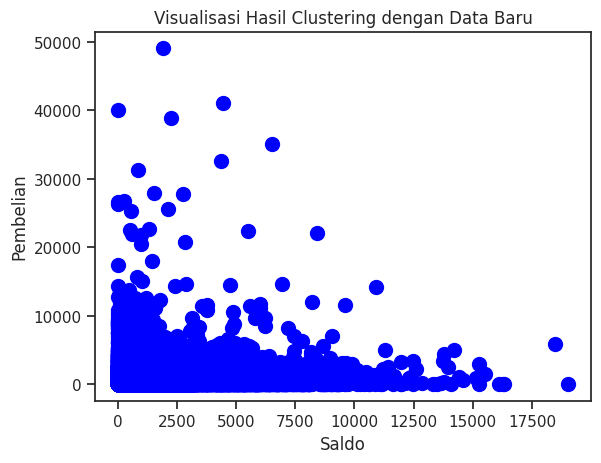

In [443]:
plt.scatter(scaled_df.iloc[:, 0], scaled_df.iloc[:, 1], c=kmeans_model.labels_, cmap='viridis')
plt.scatter(df_new['Saldo'], df_new['Pembelian'], c='blue', marker='o', s=100)
plt.title('Visualisasi Hasil Clustering dengan Data Baru')
plt.xlabel('Saldo')
plt.ylabel('Pembelian')
plt.show()

# **11. Pengambilan Kesimpulan**

* Pada kali ini kita  hanya menggunakan model Kmeans untuk melakukan sebuah clustering pada pengolahan data pengguna kartu kredit.
*   Pada dataset statistik terdapat balance/saldo yang memiliki rata-rata yaitu 1565 dan saldo maksimum yaitu 19043.
*   Terdapat Variabilitas Saldo: Varians yaitu 4332, Deviasi Standar yaitu 2081. Sedangkan Variabilitas Pembelian: Varians yaitu 4564, Deviasi Standar yaitu 2136.
*   Adapun top 5 jumlah pembelian tertinggi yaitu 3937: 17.2%, 1604: 19.1%, 1256: 19.6%, 501: 20.1%, dan 550: 24.0%.
* Kami memilih 4 cluster berdasarkan pada Elbow Method.
* Berdasarkan pada analisis kami menggunakan elbow method, didapatkan 4 cluster dengan jumlah yang optimal.
* Untuk melakukan prediksi, variabel yang digunakan yaitu, Saldo, PenarikanTunai, PembelianAngsuran, Pembelian, Pembayaran, PembelianOneoff, BatasKredit, MinimalPembayaran, dan JangkaWaktu. Sedangkan untuk variabel dependen atau target yang digunakan yaitu Labels.
* Untuk mengatasi missing value pada analisis ini kami menggunakan pengisian missing value dengan menggunakan median.
* Pada analis ini menggunakan beberapa visualisasi yaitu histogram, pie plot, heatmap, line plot dan scatter plot.